In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
from gammapy.utils.random import InverseCDFSampler

In [16]:
def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)

def q(x):
    return st.norm.pdf(x, loc=50, scale=30)


x = np.arange(-50, 151)
k = max(p(x) / q(x))


def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)


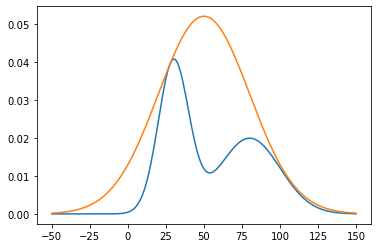

In [17]:
plt.plot(x, p(x))
plt.plot(x, k*q(x))

In [5]:
%%time
s = rejection_sampling(iter=10000)

CPU times: user 2.27 s, sys: 15 ms, total: 2.29 s
Wall time: 2.31 s


In [25]:
x = np.linspace(-50, 150, 10000)
pdf = p(x)

In [26]:
sampler = InverseCDFSampler(pdf=pdf)

In [27]:
%time
s = sampler.sample(int(1e6))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


In [28]:
s = np.interp(s, np.arange(len(x)), x)

In [31]:
bins = np.linspace(-50, 150, 500)
h = np.histogram(s, bins=bins)

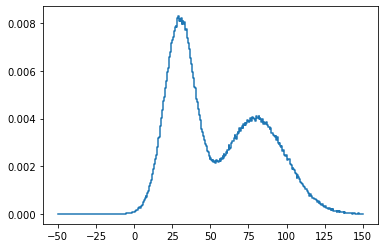

In [32]:
x_h = (h[1][:-1] + h[1][1:]) / 2.
plt.step(x_h, h[0] / h[0].sum())